<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 3*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Using your baseline model from yesterday, hyperparameter tune it and report on your highest validation accuracy. Your singular goal today is to achieve the highest accuracy possible.

*Don't forgot to switch to GPU on Colab!*

### Hyperparameters to Tune

At a minimum, tune each of these hyperparameters using any strategy we discussed during lecture today: 
- Optimizer
- Learning Rate
- Activiation Function
  - At least 1 subparameter within the Relu activation function
- Number of Neurons in Hidden Layers
- Number of Hidden Layers
- Weight Initialization

# Imports

In [1]:
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adagrad, SGD, Ftrl, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorboard.plugins.hparams import api as hp

import os
import datetime

# Read in data

In [2]:
def load_quickdraw(path):
    """
    Loads the data, normalizes it, splits into target and feature
    Preforms train test split
    @param path: path to data
    returns : train test split tuple
    """
    data = np.load('../quickdraw10.npz')
    X = data['arr_0']
    y = data['arr_1']
    X = X  / 255
    X, y = shuffle(X, y)
    return train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = load_quickdraw("../quickdraw10.npz")

# When i did it on my own it worked but using the built ins im getting a memory crash, guess i don't have enough vram. Dunno how to use tensorboard

# Tensorboard + Tuning

In [4]:
def create_model(nuerons:int, hidden_layers:int, activation:str, out_activation, optimizer, learning_rate:float):
    # create model
    model = Sequential()
    # first layer is special so make out of for loop
    model.add(Dense(nuerons, input_dim=784, activation=activation))
    if hidden_layers > 1:
        for i in [int(i) for i in np.linspace(10,nuerons,hidden_layers+1)[1:-1]]:
            model.add(Dense(i, activation=activation))
    model.add(Dense(10, activation=out_activation))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate), metrics=['accuracy'])
    return model

In [5]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [6]:
param_grid = {'batch_size': (32,64,512),
              'epochs': [15],
              'nuerons': (500, 200, 32),
              'hidden_layers': (1,3,5,8),
              'activation': ('relu', 'sigmoid', 'tanh'),
              'out_activation': ['softmax'],
              'optimizer': (Adam, Adagrad, SGD, Ftrl, RMSprop),
              'learning_rate': tuple(np.linspace(.001, .01, 5))
             }

In [9]:
search = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_jobs=8,cv=2,random_state=42,verbose=1,n_iter=30)
search_result = search.fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
print(f"Best: {searcg_result.best_score_} using {search_result.best_params_}")
means = search_result.cv_results_['mean_test_score']
stds = search_result.cv_results_['std_test_score']
params = search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

In [119]:
[round(i,4) for i in  np.linspace(.001, .01, 5)]

[0.001, 0.0032, 0.0055, 0.0078, 0.01]

In [ ]:
# try keras classifier i think that it inherit the parameters from the function used to amake the model
# if yes you can grid search 

# I didn't want to more or less copy nd paste so i did this, waste of time i think, was what i did 1st 

In [7]:
# # possible inputs for model creation
# # number of nuerons in a layer
# # number of layers
# # activation function per layer
# # loss function
# # optimizer

# # layer_schema = ((nuerons, activation), (), ())
# # optimzer:str check if in tensorflow else raise error
# # loss:str check if in tf else raise error

# def make_model(layer_schema:tuple, optimizer, learning_rate:float):
#     """
#     Create's a densly connected sequential nueral network given the schema
#     @param layer_schema: multi-dimensional tuple where each elemnt is a layer and the sub-elements[0] 
#     are the number of nuerons for the layer, and the sub-elements[1] are the activation function the layer
#     ex: if layer_schema == ((32, 'relu'), (50, 'relu'), (10, 'softmax')) there are 4 layer.
#     The implicit input layer, 2 hidden layers, and 1 output layer. The 1st hidden layer has 32 nuerons and and acticvation function of 'relu',
#     second has 50 nuerons and 'relu', and the an output layer with 10 nuerons and 'softmax' as the activation
#     @param optimzer: non instantiated optimizer
#     @param learning_rate: float, learning rate for the optimizer
#     """
    
#     model = Sequential()
#     # the first layer has an extra field input so it's done out of the for loop
#     model.add(Dense(layer_schema[0][0], input_dim=784, activation=layer_schema[0][1]))
#     for layer in layer_schema[1:]:
#         model.add(Dense(layer[0], activation=layer[1]))
#     #compile model
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate), metrics=['accuracy'])
#     return model

# # how to hypertune?
# # [optimizers], [schemas], [loss but constant]
# # for optimizer in optimizers
# #     for schema in schemas
# #         for loss in loss
# #             call make given these hyper params
# #             fit model
# #             log something

In [63]:
# optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD]
# schemas = [
#     ((32, 'relu'), (10, 'softmax')), 
#     ((32, 'relu'), (20, 'relu'), (10, "softmax")),
#     ((32, 'tanh'), (10, 'softmax')), 
#     ((32, 'tanh'), (20, 'tanh'), (10, "softmax"))

# ]
# rates = [.001, .01]

In [61]:
# for optimizer in optimizers:
#     for schema in schemas:
#         for rate in rates:
#             model = make_model(layer_schema=schema, learning_rate=rate, optimizer=optimizer)
#             model.fit(X_train, y_train, epochs=15)
#             with open('assignment_logs.txt', 'a') as logs:
#                 logs.write(f'{model.evaluate(X_test, y_test)[-1]},{"adam" if type(optimizer()) == tf.python.keras.optimizer_v2.adam.Adam else "sgd"},{rate},{len(schema) + 1},{",".join(str(i[0]) for i in schema)},{",".join([i[1] for i in schema])}\n')

Epoch 1/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8431 - accuracy: 0.7513
Epoch 2/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.6492 - accuracy: 0.8100
Epoch 3/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5926 - accuracy: 0.8274
Epoch 4/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5595 - accuracy: 0.8377
Epoch 5/15
2094/2094 [==============================] - 2s 1ms/step - loss: 0.5361 - accuracy: 0.8442
Epoch 6/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5156 - accuracy: 0.8502
Epoch 7/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5027 - accuracy: 0.8537
Epoch 8/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.4889 - accuracy: 0.8569
Epoch 9/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.4786 - accuracy: 0.8600
Epoch 10/15
2094/2094 [==============================] - 3s 1ms/step - loss: 0.469

In [73]:
# with open("assignment_logs.txt", "r") as logs:
#     data = logs.readlines()
#     data = [i.strip('\n').split(',') for i in data]

In [75]:
# import matplotlib.pyplot as plt

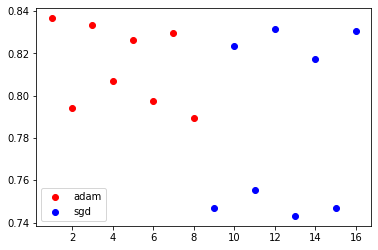

In [84]:
# fig, ax = plt.subplots()

# ax.scatter(range(1,9), [float(i[0]) for i in data[:8]], color='r', label='adam')
# ax.scatter(range(9,17), [float(i[0]) for i in data[8:]], color='b', label='sgd')

# ax.legend()
# plt.show()

In [74]:
data

[['0.8365757465362549', 'adam', '0.001', '3', '32', '10', 'relu', 'softmax'],
 ['0.7942727208137512', 'adam', '0.01', '3', '32', '10', 'relu', 'softmax'],
 ['0.8333333134651184',
  'adam',
  '0.001',
  '4',
  '32',
  '20',
  '10',
  'relu',
  'relu',
  'softmax'],
 ['0.8070605993270874',
  'adam',
  '0.01',
  '4',
  '32',
  '20',
  '10',
  'relu',
  'relu',
  'softmax'],
 ['0.8264545202255249', 'adam', '0.001', '3', '32', '10', 'tanh', 'softmax'],
 ['0.7973030209541321', 'adam', '0.01', '3', '32', '10', 'tanh', 'softmax'],
 ['0.829727292060852',
  'adam',
  '0.001',
  '4',
  '32',
  '20',
  '10',
  'tanh',
  'tanh',
  'softmax'],
 ['0.7894545197486877',
  'adam',
  '0.01',
  '4',
  '32',
  '20',
  '10',
  'tanh',
  'tanh',
  'softmax'],
 ['0.7469090819358826', 'sgd', '0.001', '3', '32', '10', 'relu', 'softmax'],
 ['0.8233939409255981', 'sgd', '0.01', '3', '32', '10', 'relu', 'softmax'],
 ['0.7554848194122314',
  'sgd',
  '0.001',
  '4',
  '32',
  '20',
  '10',
  'relu',
  'relu',
  'so

In [ ]:
# example of log file
# accuracyoptimizer,learning_rate,num_layers,nuerons,activation
# 98.32,adam,.001,4,784,32,50,10,None,relu,relu,softmax

In [62]:
# for optimizer in optimizers:
#     for schema in schemas:
#         for rate in rates:
#             print(f'{model.evaluate(X_test, y_test)[-1]}')
#             print(f'{"adam" if type(optimizer) == tf.python.keras.optimizer_v2.adam.Adam else "sgd"}')
#             print(f'{rate}')
#             print(f'{len(schema) + 1}')
#             print(f'{",".join(str(i[0]) for i in schema)}')
#             print(f'{",".join(str(i[1]) for i in schema)}')
#             with open("assignment_logs.txt", 'a') as logs:
#                 logs.write(f'{model.evaluate(X_test, y_test)[-1]},{"adam" if type(optimizer) == tf.python.keras.optimizer_v2.adam.Adam else "sgd"},{rate},{len(schema) + 1},{",".join(str(i[0]) for i in schema)},{",".join([i[1] for i in schema])}\n')

### Stretch Goals
- Implement Bayesian Hyper-parameter Optimization
- Select a new dataset and apply a neural network to it.
- Use a cloud base experiment tracking framework such as weights and biases
- Research potential architecture ideas for this problem. Try Lenet-10 for example. 